   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


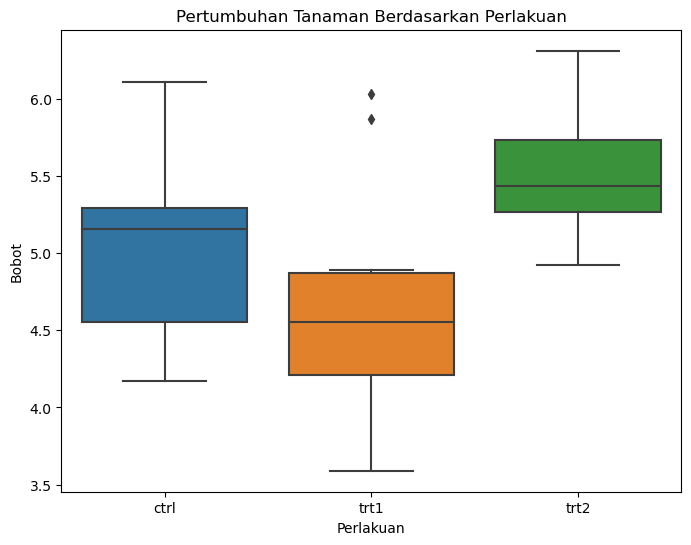

Hasil ANOVA:
Nilai F = 4.846087862380136
p-value = 0.0159099583256229

Hasil Uji Perbedaan Antara Pasangan Perlakuan:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


In [4]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Membuat dataset plant growth secara manual
data = {
    'weight': [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14, 
               4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 
               6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26],
    'group': ['ctrl']*10 + ['trt1']*10 + ['trt2']*10
}

# Membuat DataFrame dari dataset
plant_growth = pd.DataFrame(data)

# Menampilkan beberapa baris pertama dataset
print(plant_growth.head())

# Visualisasi data menggunakan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=plant_growth)
plt.title('Pertumbuhan Tanaman Berdasarkan Perlakuan')
plt.xlabel('Perlakuan')
plt.ylabel('Bobot')
plt.show()

# Melakukan ANOVA untuk menentukan perbedaan antara perlakuan
anova_result = f_oneway(plant_growth['weight'][plant_growth['group'] == 'ctrl'],
                        plant_growth['weight'][plant_growth['group'] == 'trt1'],
                        plant_growth['weight'][plant_growth['group'] == 'trt2'])

print("Hasil ANOVA:")
print("Nilai F =", anova_result.statistic)
print("p-value =", anova_result.pvalue)

# Melakukan uji perbedaan antara pasangan perlakuan menggunakan Tukey's HSD
tukey_result = pairwise_tukeyhsd(plant_growth['weight'], plant_growth['group'])
print("\nHasil Uji Perbedaan Antara Pasangan Perlakuan:")
print(tukey_result)